In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread

In [2]:
TRAIN_DIR = 'data/train/'
TRAIN_FILES = os.listdir(TRAIN_DIR)
len(TRAIN_FILES)

220026

In [3]:
img = imread(TRAIN_DIR + TRAIN_FILES[1])
img.shape

(96, 96, 3)

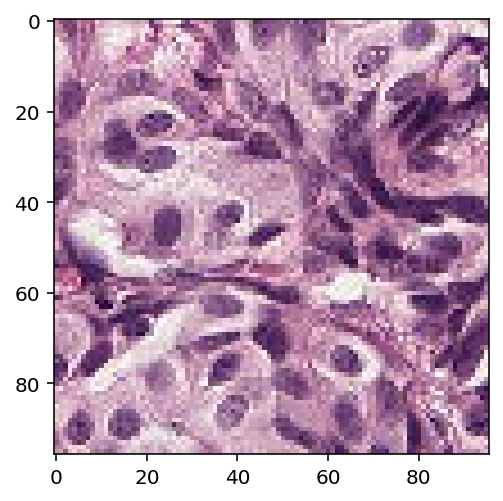

In [4]:
plt.imshow(img);

In [5]:
def show_color(img, cvt_color, max_val=(254, 254, 254)):
    max_val = [x if x > 0 else 254 for x in max_val]
    img = cv2.cvtColor(img, cvt_color)
    _, ((ax1, ax2, ax3), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(17,8))
    ax1.imshow(img[:, :, 0], cmap='gray', vmax=max_val[0]+1)
    ax2.imshow(img[:, :, 1], cmap='gray', vmax=max_val[1]+1)
    ax3.imshow(img[:, :, 2], cmap='gray', vmax=max_val[2]+1)
    ax21.hist(img[:, :, 0].ravel(), range(2, max_val[0]))
    ax22.hist(img[:, :, 1].ravel(), range(2, max_val[1]))
    ax23.hist(img[:, :, 2].ravel(), range(2, max_val[2]))

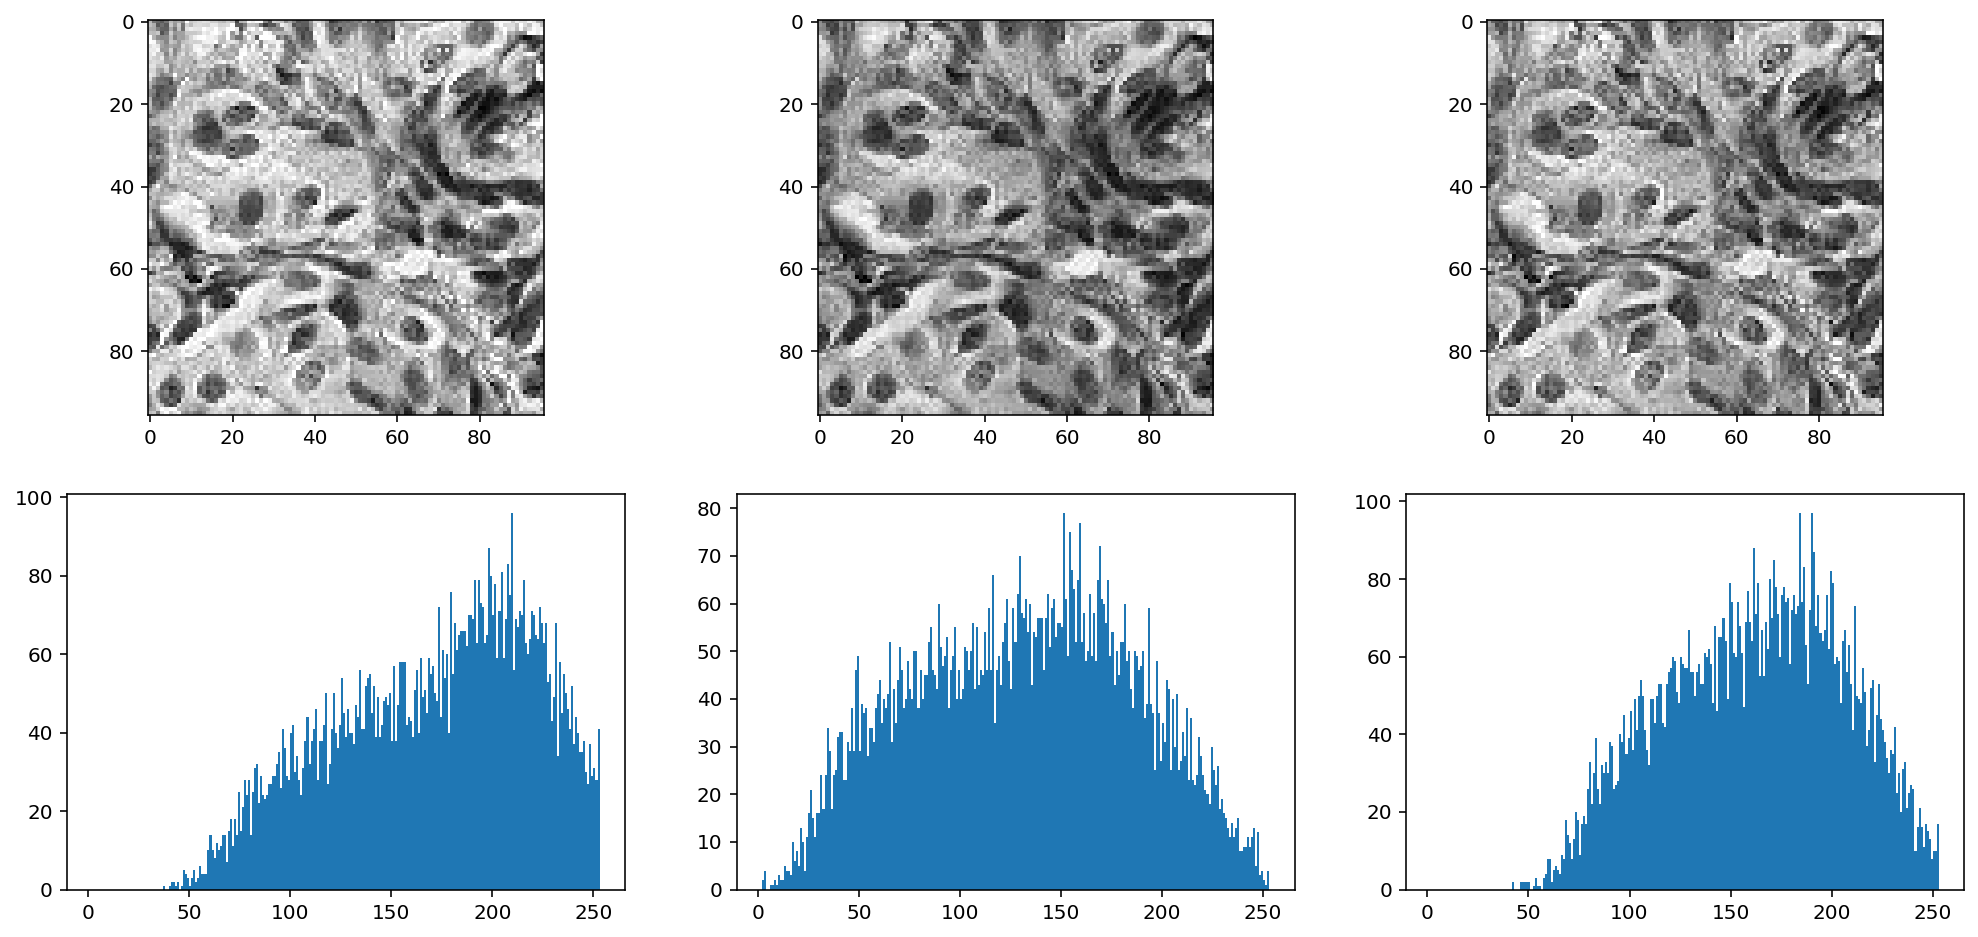

In [6]:
show_color(img, None)

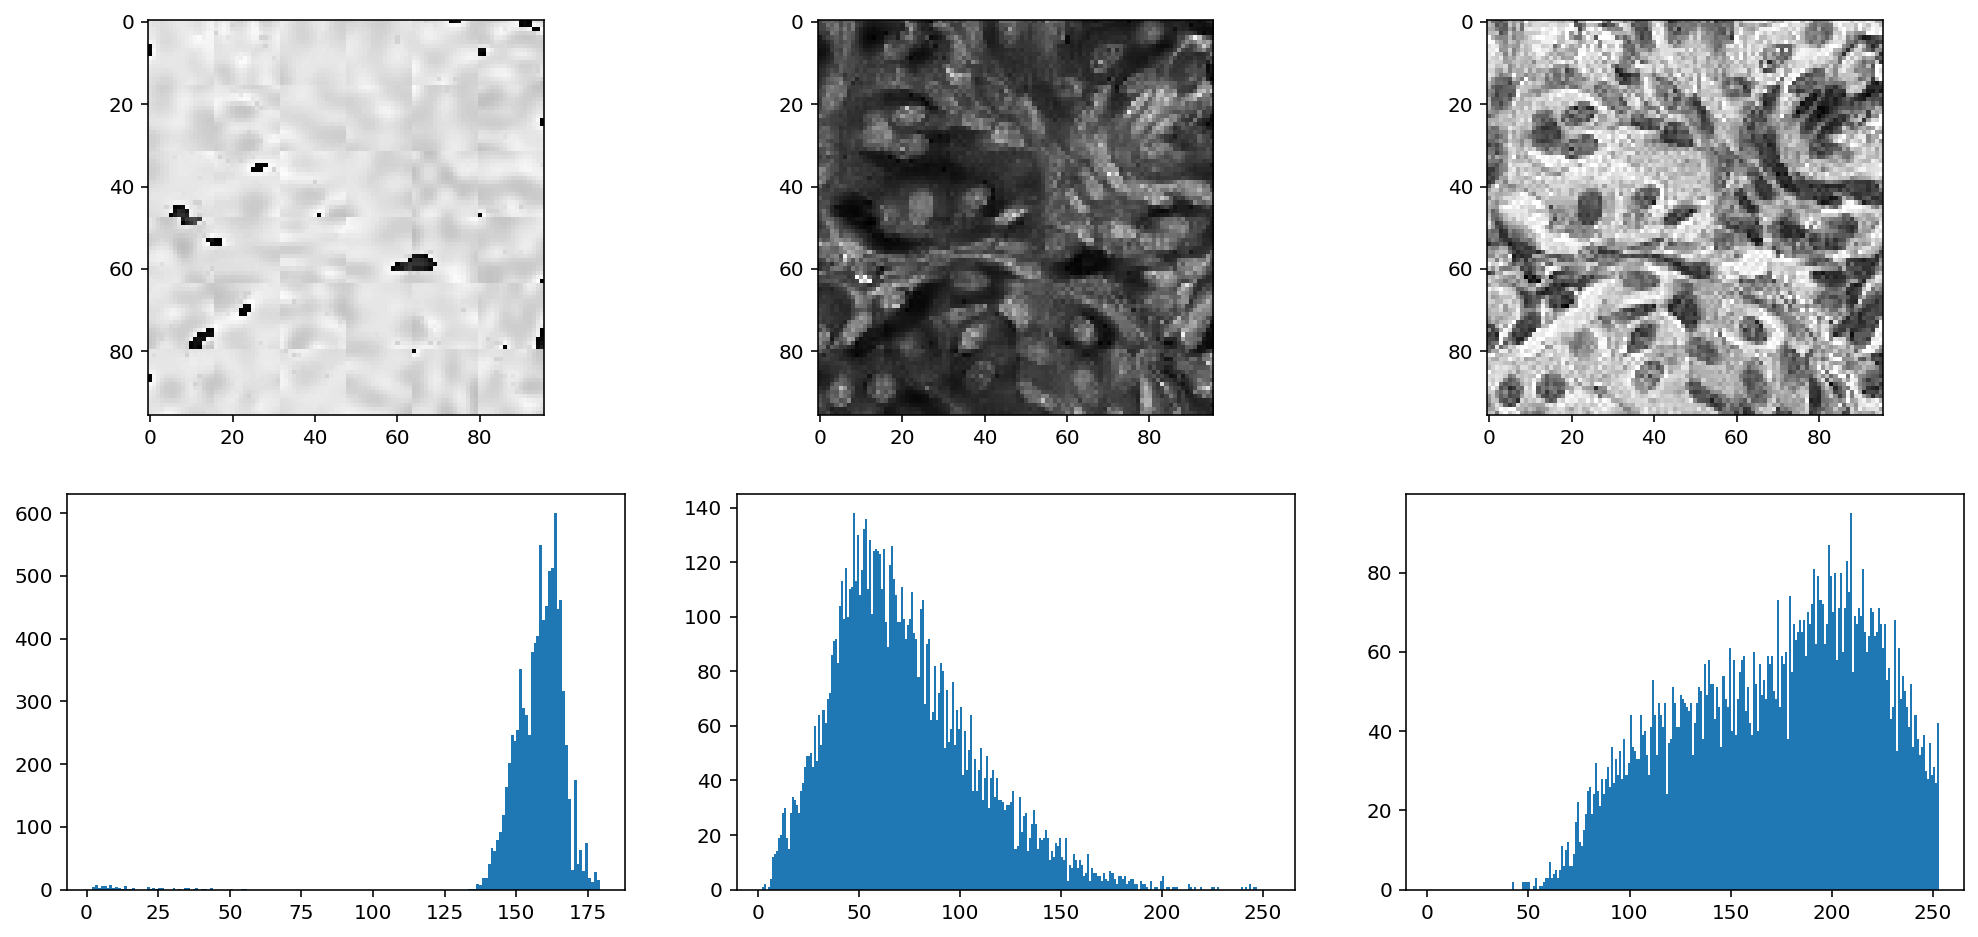

In [7]:
show_color(img, cv2.COLOR_RGB2HSV, (180, -1, -1))

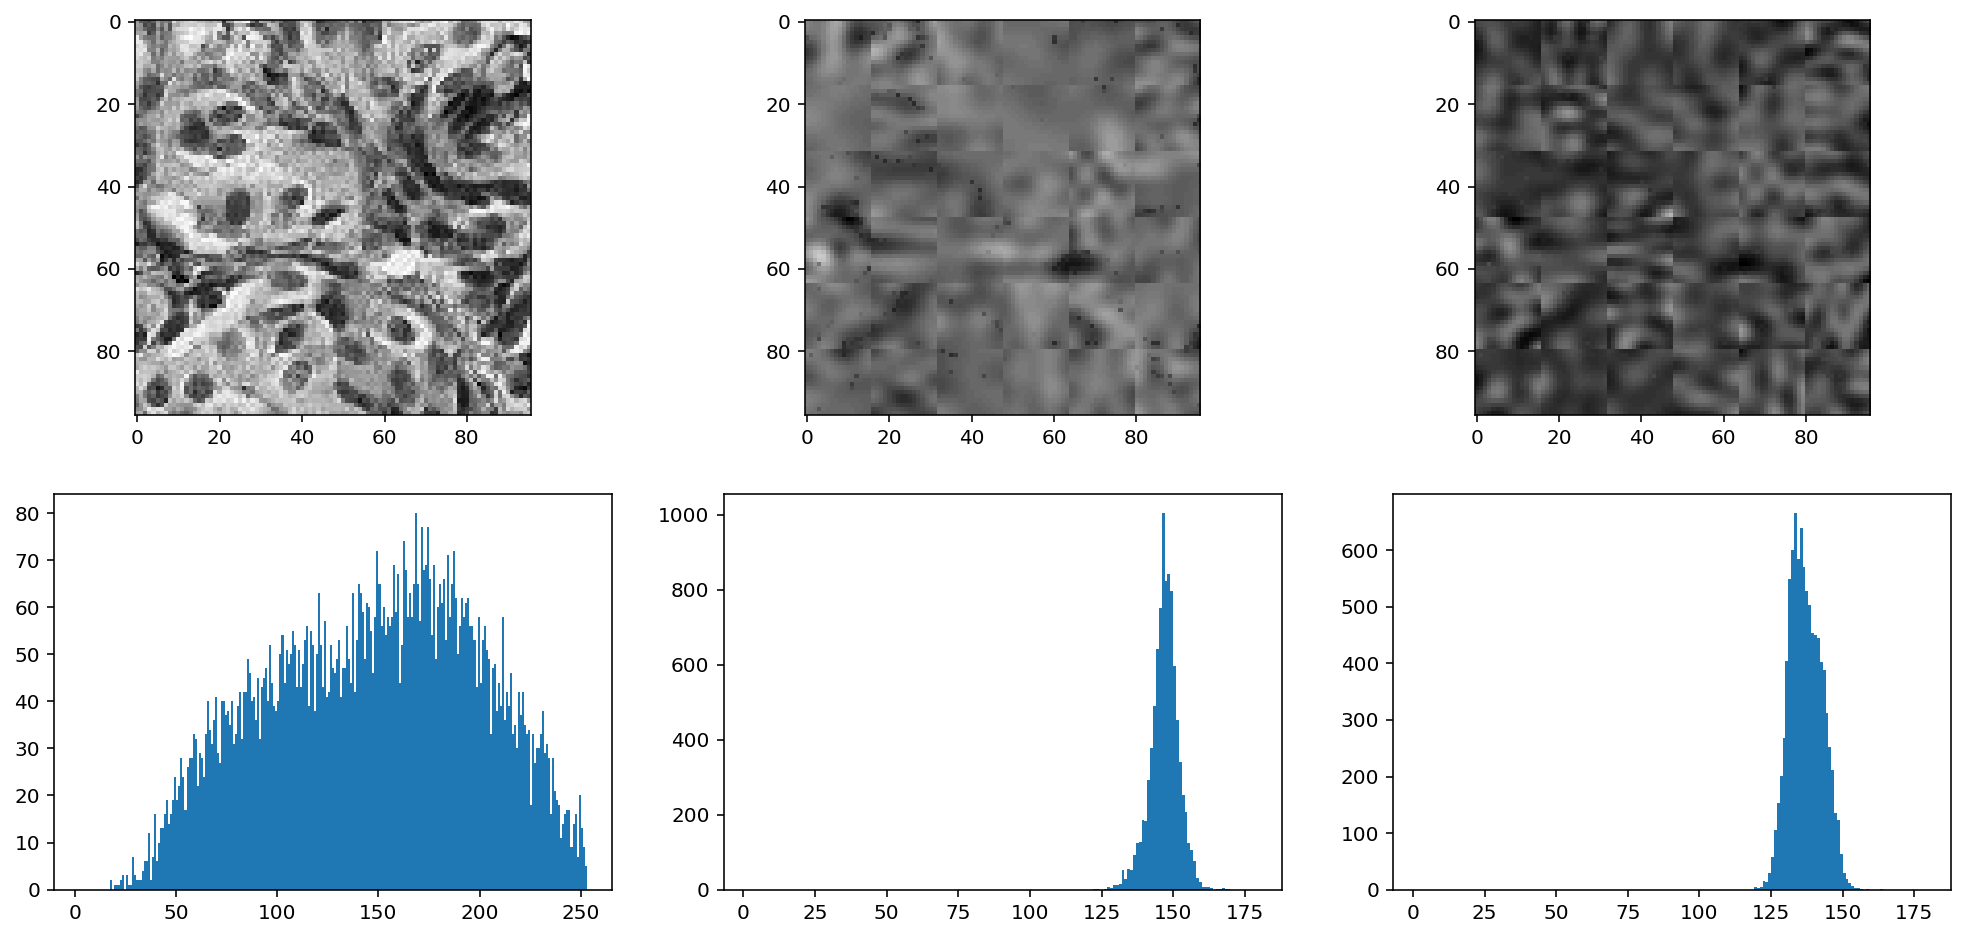

In [8]:
show_color(img, cv2.COLOR_RGB2YCrCb, (-1, 180, 180))

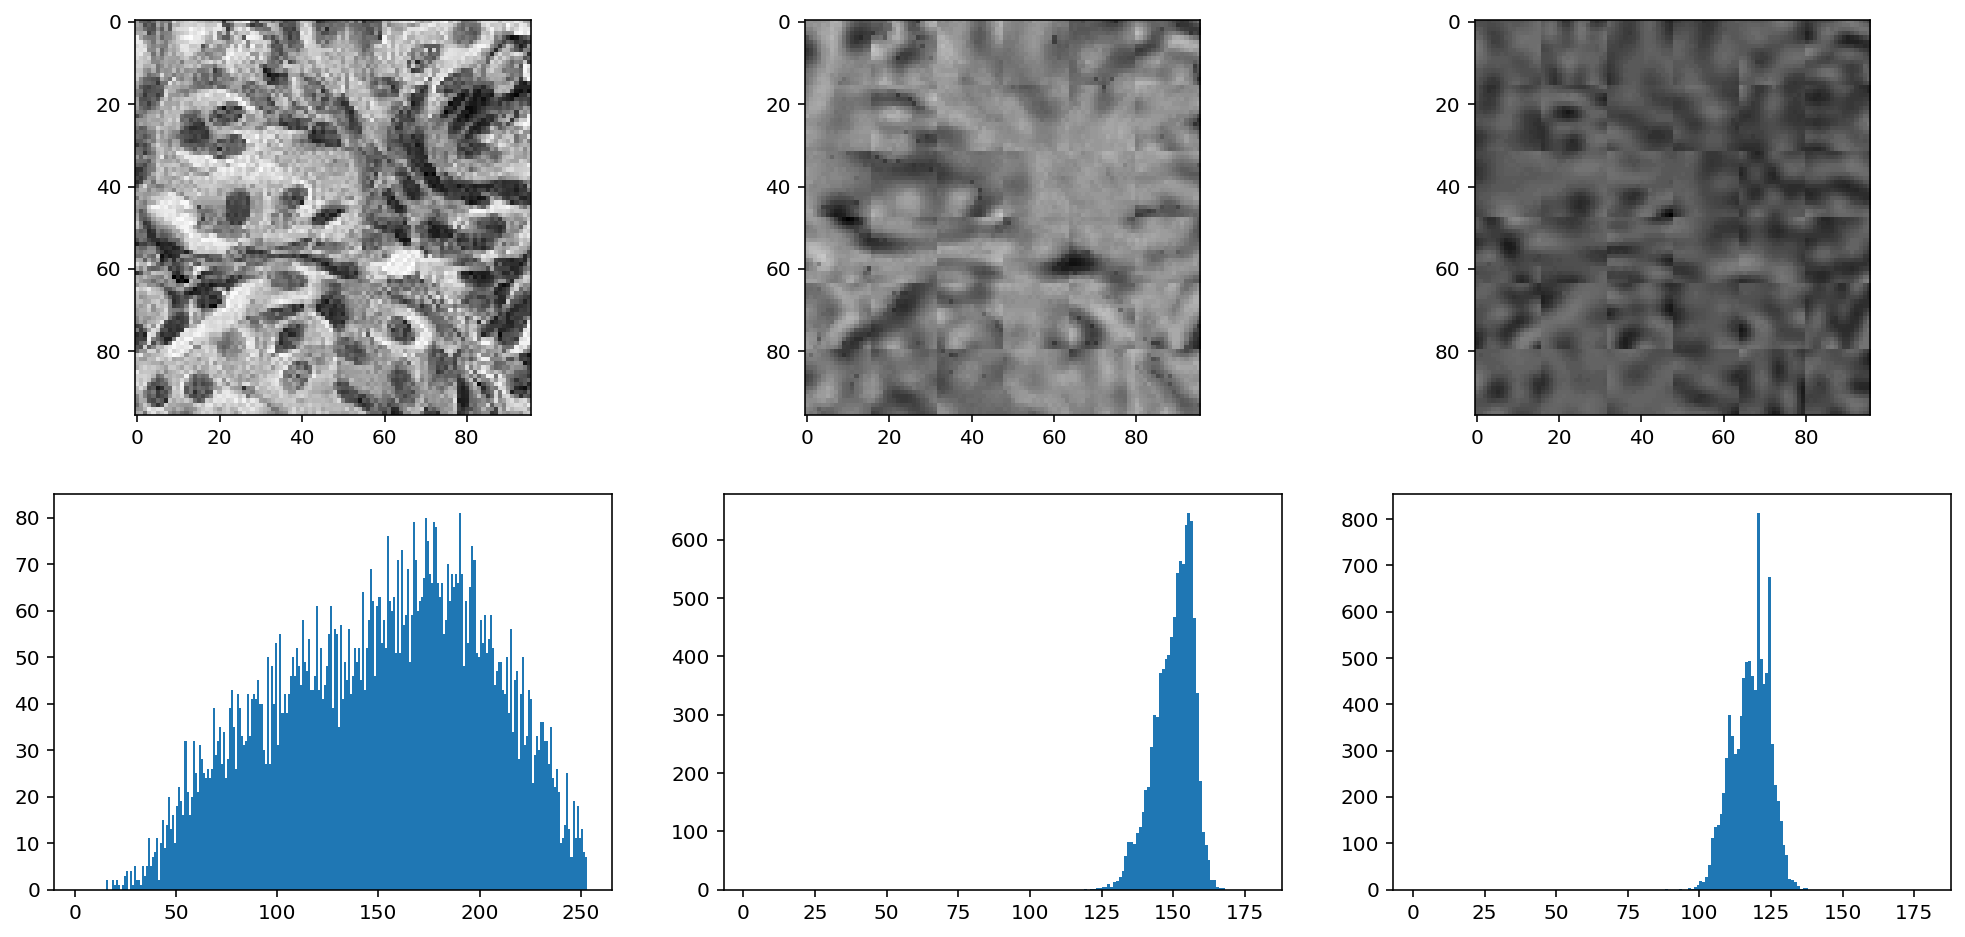

In [9]:
show_color(img, cv2.COLOR_RGB2Lab, (-1, 180, 180))

## Positive vs Negative

In [10]:
df = pd.read_csv('data/train_labels.csv')
df.head(3)

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0

In [11]:
(df['label'] == 1).value_counts()

False    130908
True      89117
Name: label, dtype: int64

In [12]:
ids = [df[df['label'] == 0]['id'].values.tolist(), df[df['label'] == 1]['id'].values.tolist()]
len(ids[0]), len(ids[1])

(130908, 89117)

In [13]:
def show8(dir: str, ids: list, title=None, cvt_color=None, chan=None):
    fig, ax = plt.subplots(2, 4, figsize=(17,8))
    for i in range(8):
        col = i % 4
        row = i // 4
        img = imread(dir + ids[i] + '.tif')
        if cvt_color:
            chans = cv2.cvtColor(img, cvt_color)
            img = chans[:, :, chan]
            cmap = 'gray'
        else:
            cmap = None
        ax[row][col].axis('off')
        ax[row][col].set_title(f'{ids[i][:5]}')
        ax[row][col].imshow(img, cmap=cmap)
    fig.suptitle(title, fontsize=16)
    fig.tight_layout()

### Negative Images

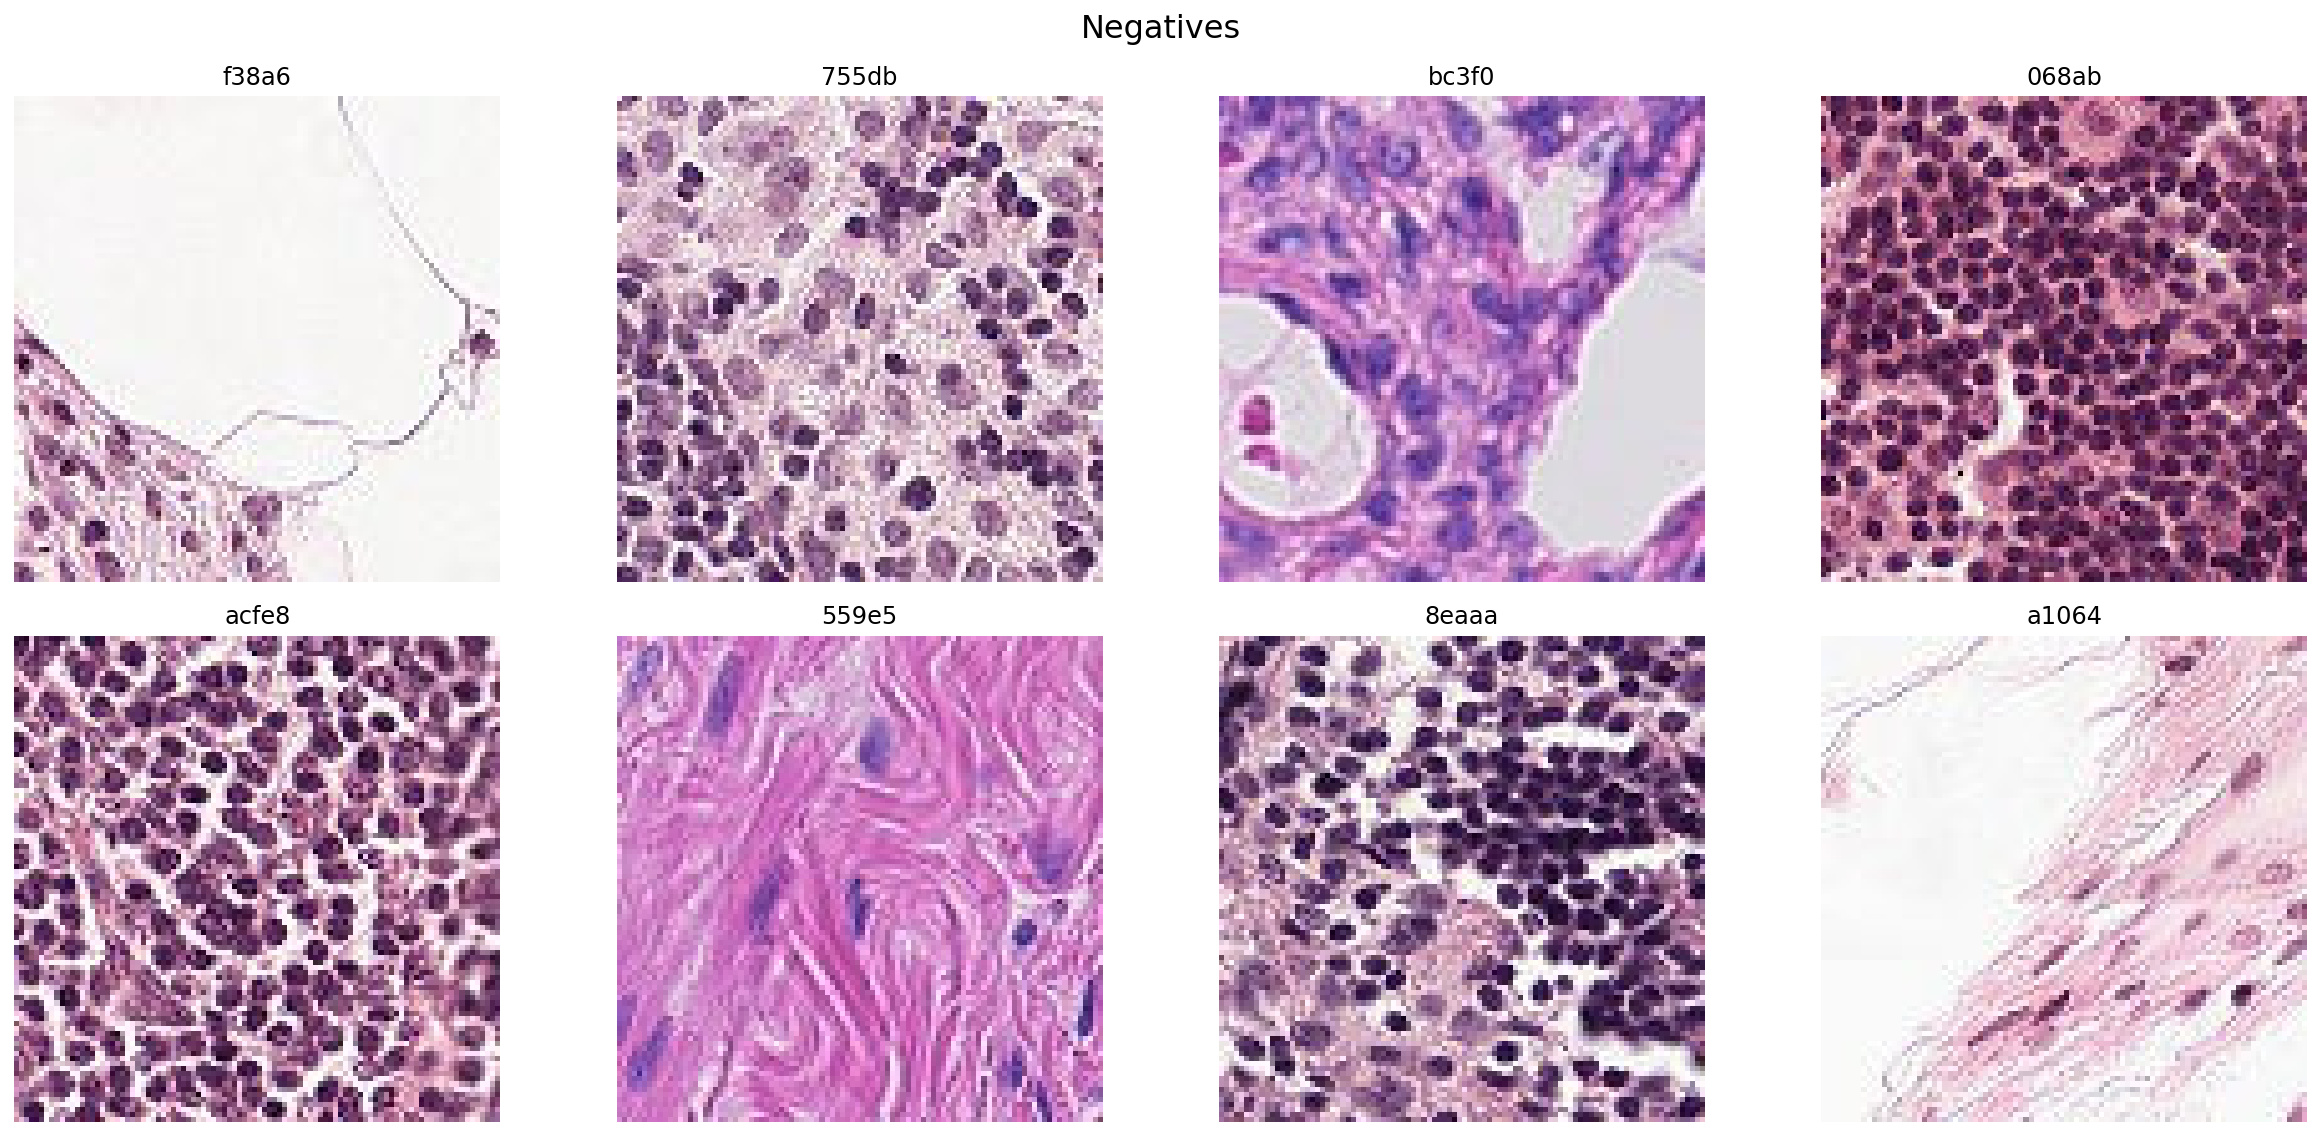

In [14]:
show8(TRAIN_DIR, ids[0][:8], 'Negatives')

### Positive Images

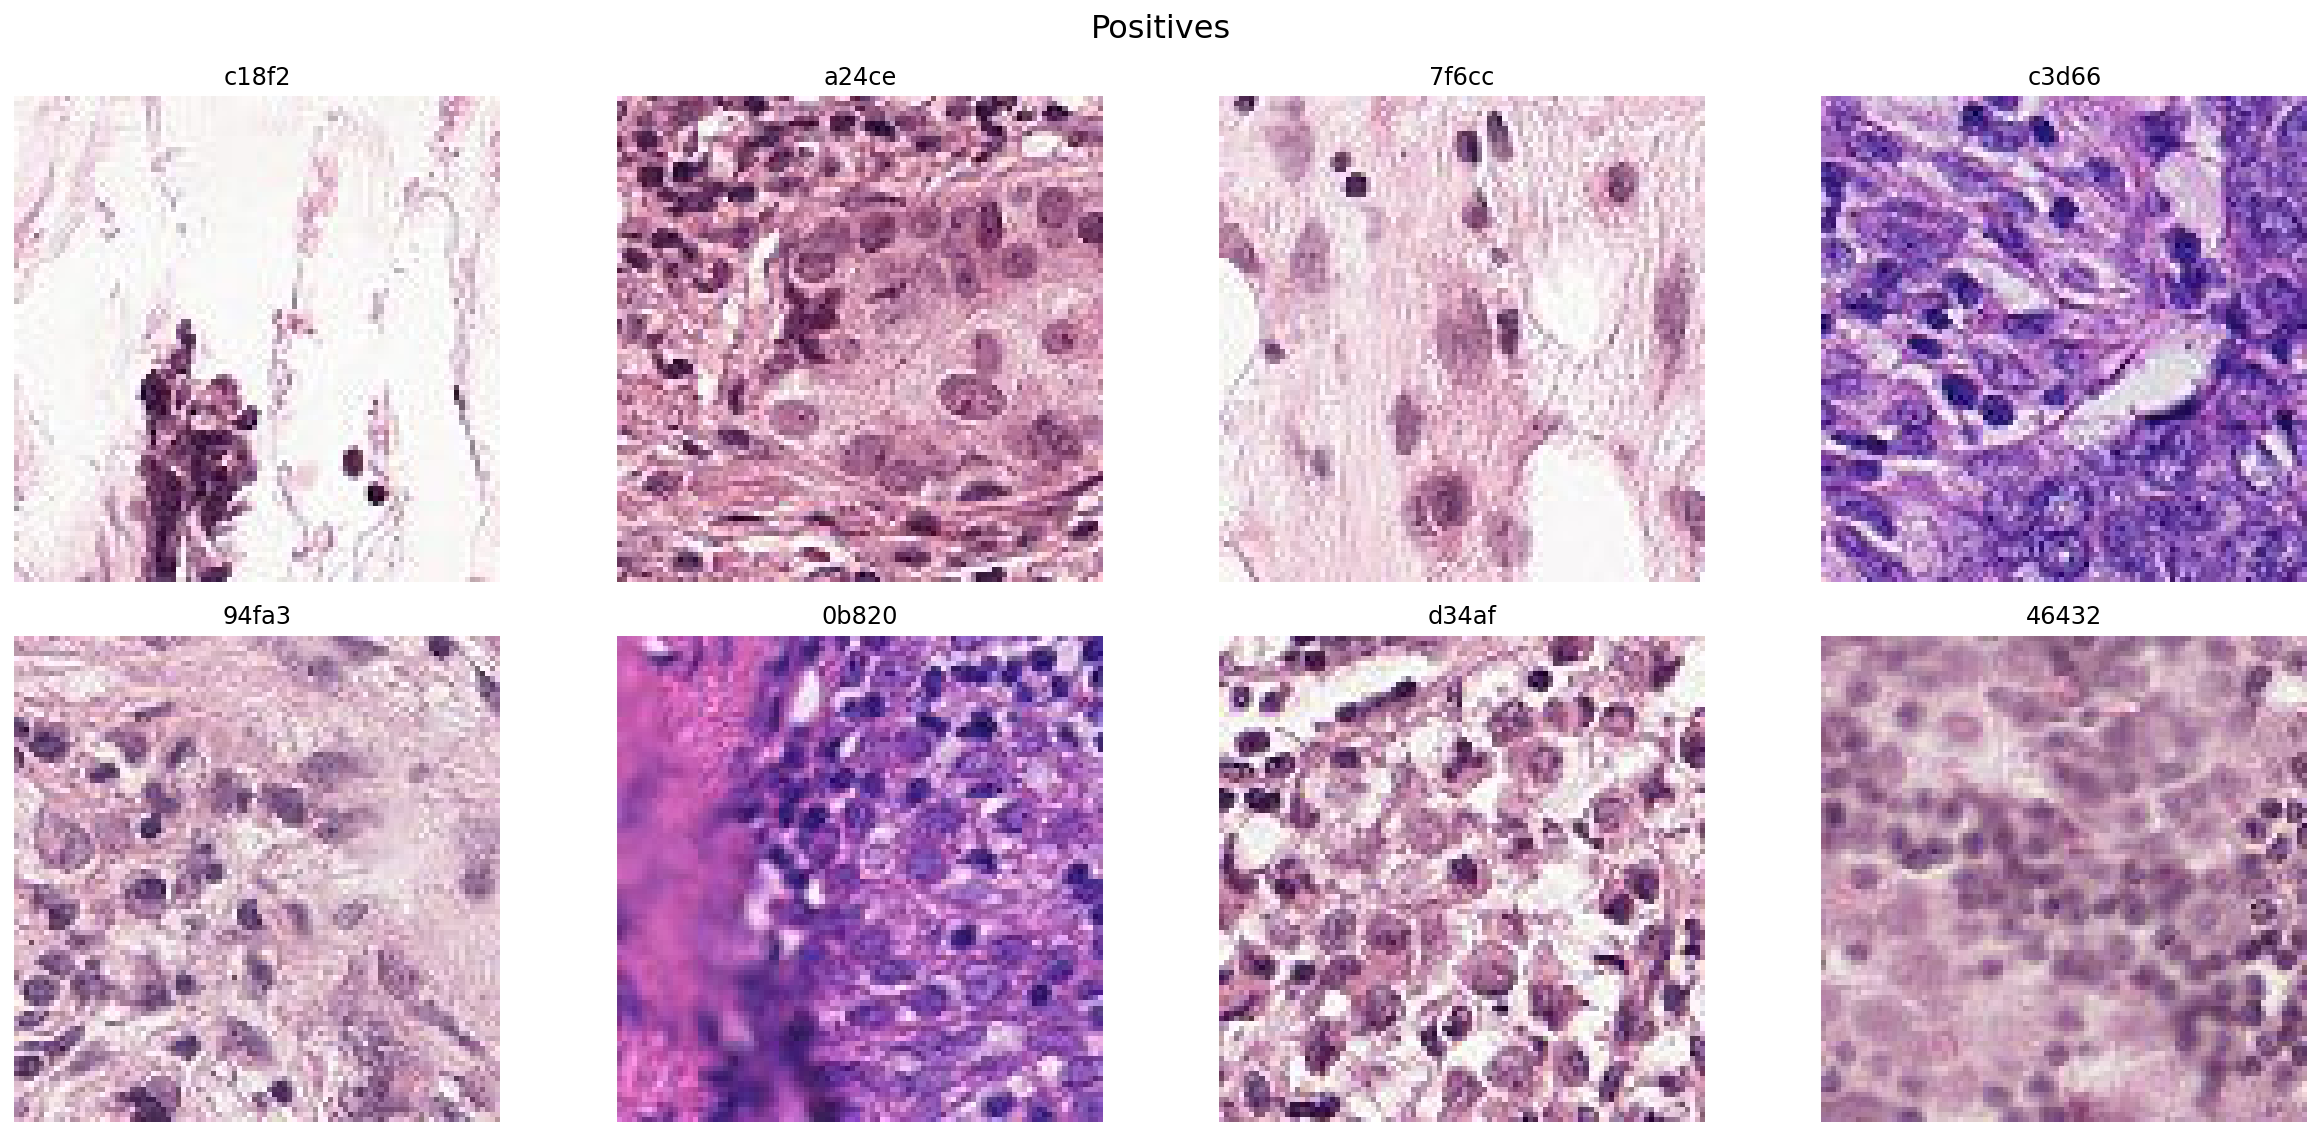

In [15]:
show8(TRAIN_DIR, ids[1][:8], 'Positives')

### Alternate Color Space (L\*A\*B)

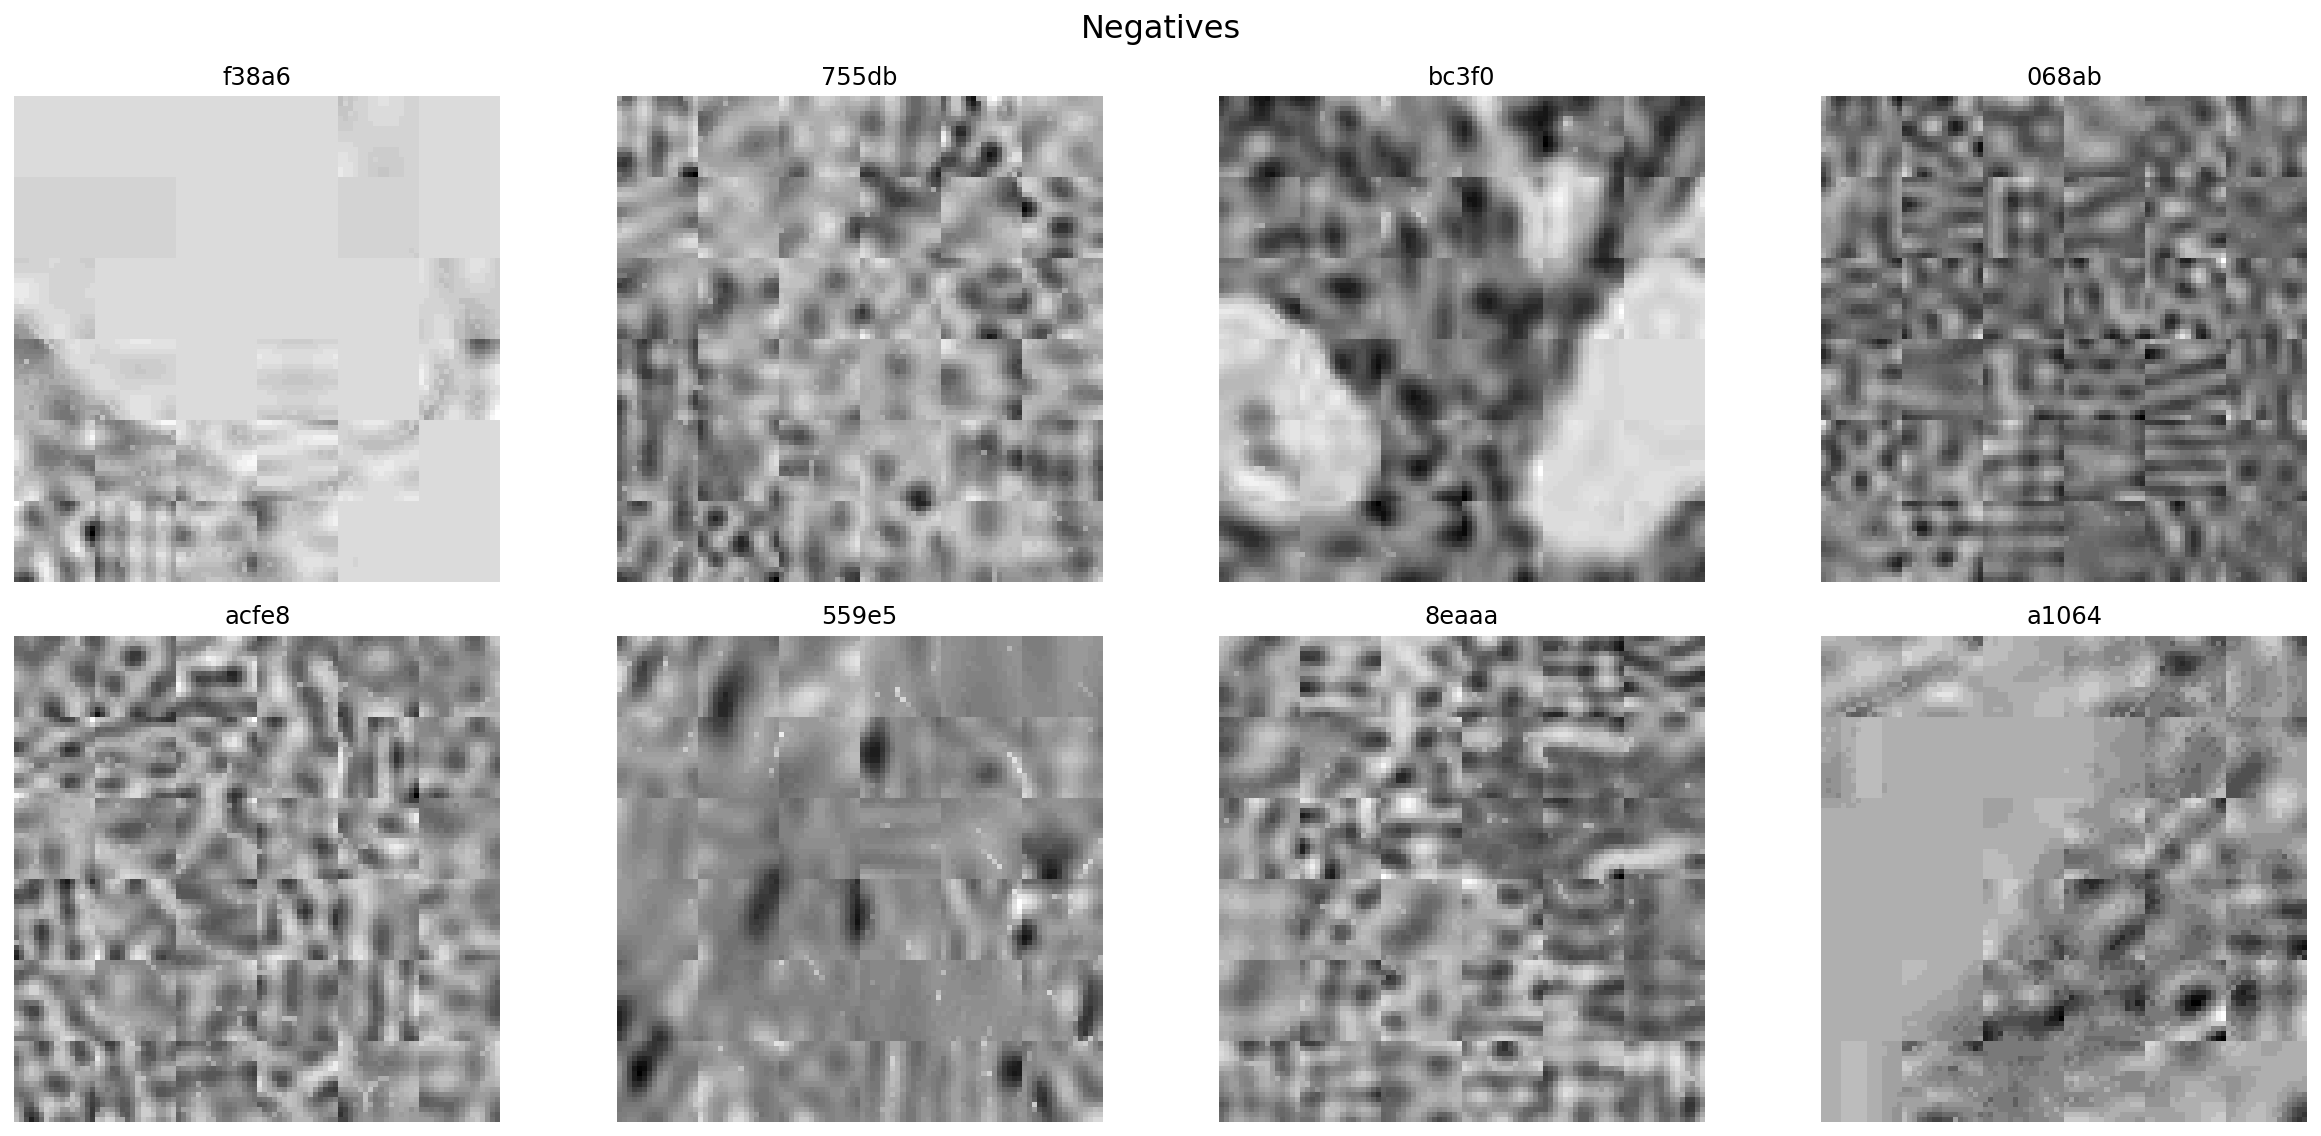

In [16]:
show8(TRAIN_DIR, ids[0][:8], 'Negatives', cv2.COLOR_RGB2Lab, 2)

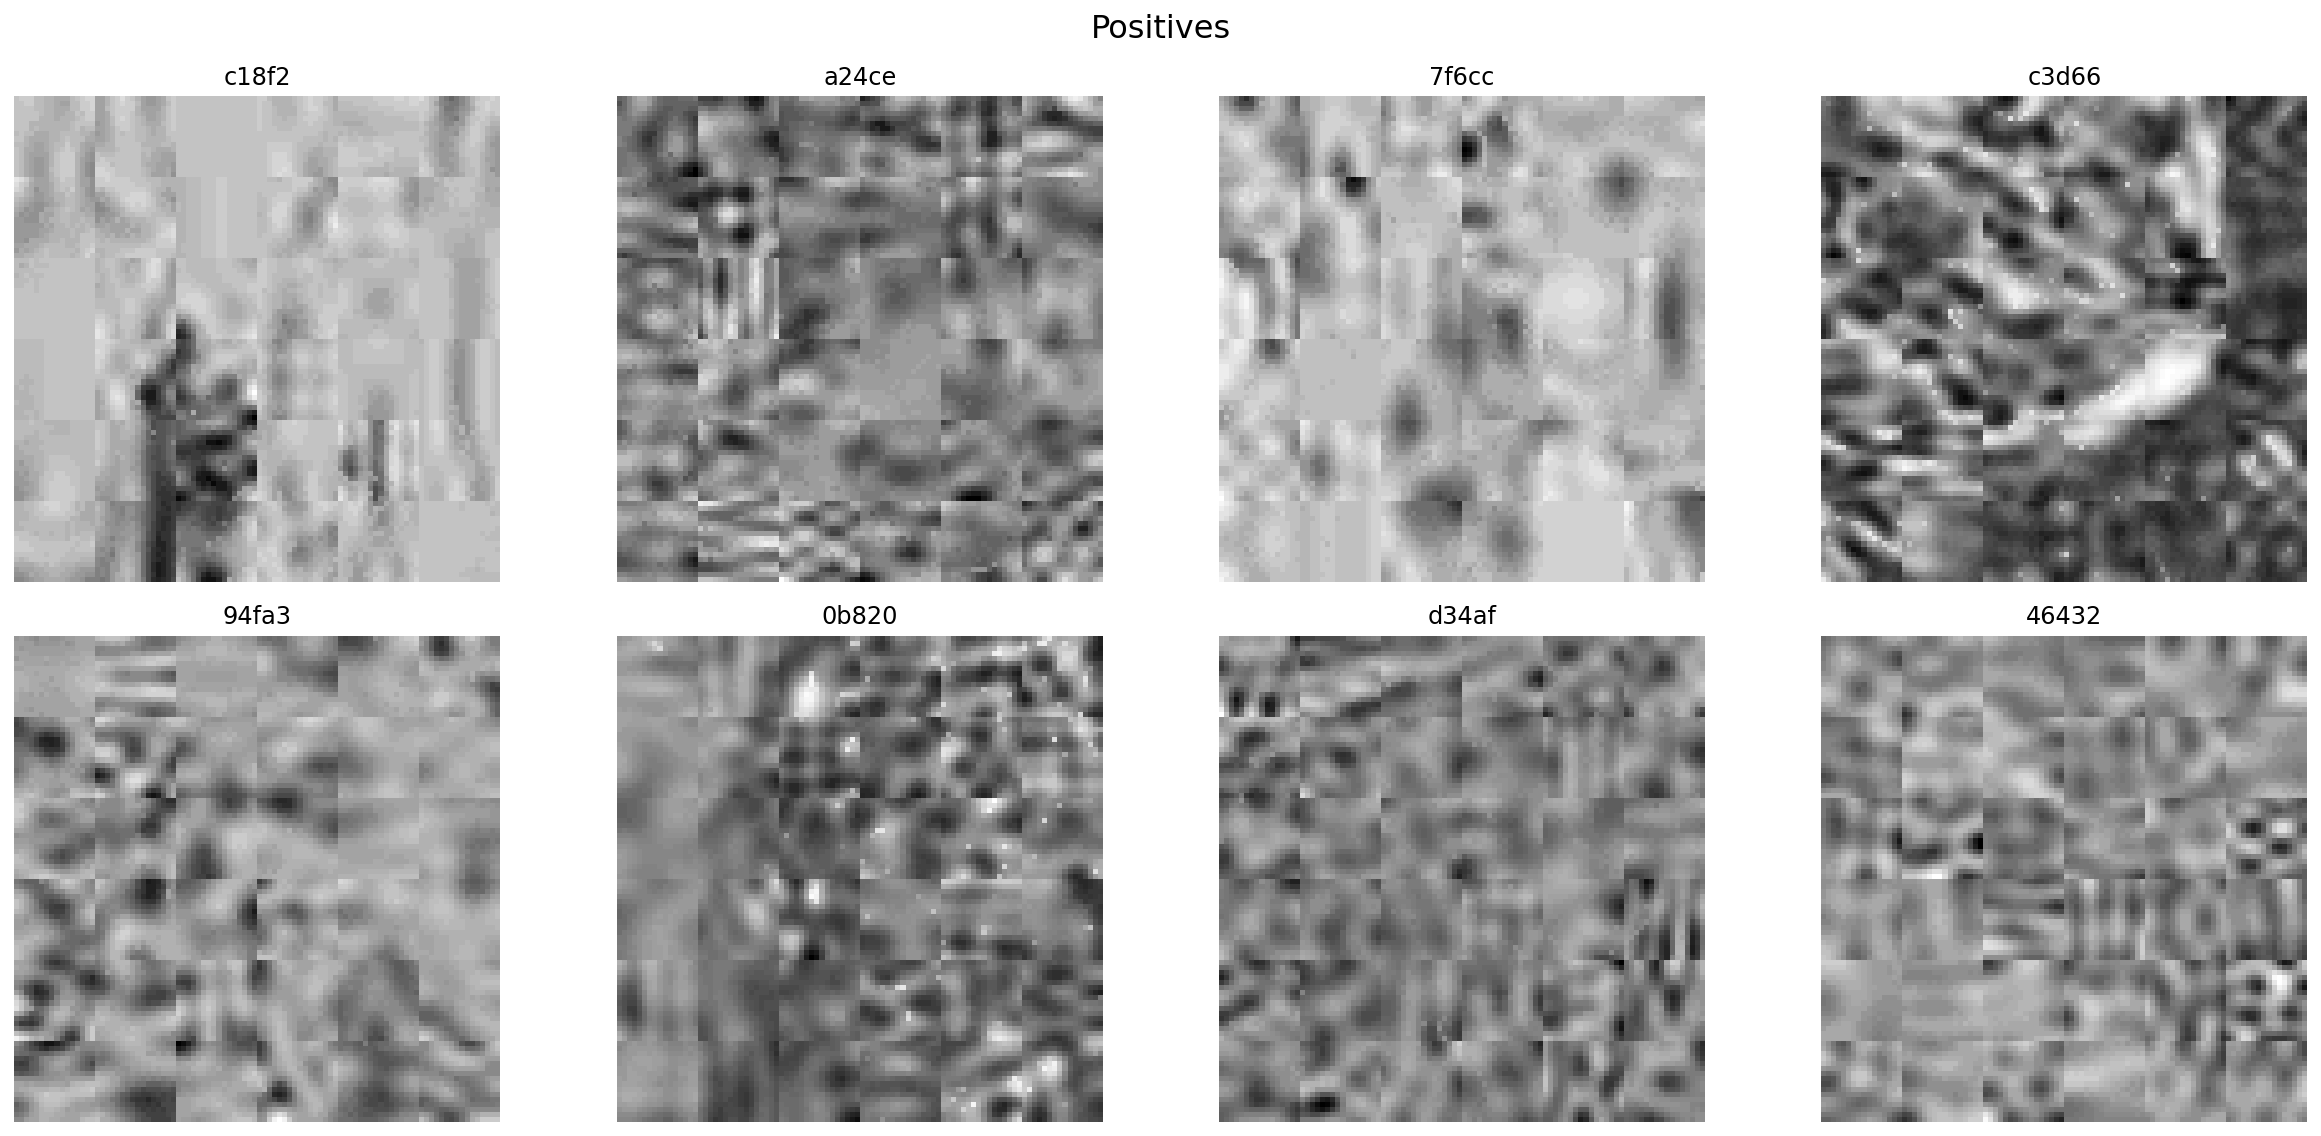

In [17]:
show8(TRAIN_DIR, ids[1][:8], 'Positives', cv2.COLOR_RGB2Lab, 2)